In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv('data/0923.csv', encoding='utf8')
ds

,seqStamp,"('Resistance', 1)","('Resistance', 2)","('Resistance', 3)","('Resistance', 4)","('Resistance', 5)","('Resistance', 6)","('Resistance', 7)","('Resistance', 8)","('Resistance', 9)",...,"('Resistance', 87)","('Resistance', 88)","('Resistance', 89)","('Resistance', 90)","('Resistance', 91)","('Resistance', 92)","('Resistance', 93)","('Resistance', 94)","('Resistance', 95)","('Resistance', 96)"
0,0,0.487,0.472,0.492,0.489,0.478,0.503,0.495,0.498,0.493,...,0.484,0.484,0.478,0.482,0.475,0.480,0.485,0.477,0.476,0.484
1,1,0.488,0.473,0.491,0.490,0.477,0.502,0.496,0.506,0.489,...,0.486,0.489,0.482,0.481,0.470,0.477,0.484,0.477,0.474,0.490
2,2,0.487,0.474,0.492,0.489,0.475,0.503,0.496,0.504,0.489,...,0.487,0.487,0.478,0.482,0.471,0.479,0.485,0.473,0.476,0.488
3,3,0.486,0.475,0.491,0.492,0.476,0.503,0.495,0.501,0.494,...,0.487,0.487,0.480,0.482,0.477,0.480,0.488,0.473,0.475,0.491
4,4,0.488,0.476,0.491,0.492,0.476,0.504,0.497,0.501,0.491,...,0.488,0.486,0.478,0.482,0.478,0.479,0.487,0.479,0.477,0.491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,1496,0.583,0.646,0.628,0.621,0.633,0.575,0.557,0.645,0.594,...,0.711,0.872,0.686,0.688,0.777,0.469,0.519,0.510,0.502,0.383
1497,1497,0.581,0.645,0.627,0.621,0.635,0.576,0.558,0.646,0.596,...,0.714,0.870,0.681,0.683,0.742,0.469,0.518,0.509,0.501,0.381
1498,1498,0.581,0.648,0.627,0.623,0.635,0.576,0.558,0.647,0.597,...,0.715,0.867,0.685,0.684,0.751,0.470,0.514,0.507,0.498,0.376
1499,1499,0.587,0.640,0.622,0.622,0.641,0.576,0.558,0.647,0.597,...,0.715,0.867,0.685,0.684,0.751,0.470,0.514,0.507,0.498,0.376


In [3]:
len_ds = len(ds)
len_ds

1501

In [4]:
ds = ds.drop(['seqStamp'], axis = 1)
column = np.arange(96)
ds.columns = column

In [5]:
ds = ds.transpose()

In [6]:
label = np.arange(1,97,1)
label = label.tolist()
label = pd.DataFrame(label)
label.columns = ['CellNo']

In [7]:
resist = pd.DataFrame(ds)

In [8]:
data = pd.concat([resist, label], axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,1492,1493,1494,1495,1496,1497,1498,1499,1500,CellNo
0,0.487,0.488,0.487,0.486,0.488,0.487,0.488,0.485,0.485,0.488,...,0.583,0.584,0.583,0.582,0.583,0.581,0.581,0.587,0.587,1
1,0.472,0.473,0.474,0.475,0.476,0.475,0.476,0.474,0.473,0.474,...,0.645,0.647,0.647,0.648,0.646,0.645,0.648,0.640,0.642,2
2,0.492,0.491,0.492,0.491,0.491,0.491,0.492,0.491,0.492,0.492,...,0.632,0.631,0.631,0.630,0.628,0.627,0.627,0.622,0.628,3
3,0.489,0.490,0.489,0.492,0.492,0.492,0.493,0.491,0.492,0.491,...,0.627,0.626,0.625,0.624,0.621,0.621,0.623,0.622,0.620,4
4,0.478,0.477,0.475,0.476,0.476,0.476,0.477,0.475,0.477,0.478,...,0.635,0.636,0.634,0.633,0.633,0.635,0.635,0.641,0.631,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.480,0.477,0.479,0.480,0.479,0.479,0.480,0.483,0.479,0.479,...,0.469,0.472,0.471,0.467,0.469,0.469,0.470,0.470,0.465,92
92,0.485,0.484,0.485,0.488,0.487,0.487,0.487,0.486,0.485,0.486,...,0.515,0.517,0.519,0.518,0.519,0.518,0.514,0.514,0.517,93
93,0.477,0.477,0.473,0.473,0.479,0.478,0.474,0.477,0.477,0.479,...,0.513,0.515,0.516,0.515,0.510,0.509,0.507,0.507,0.515,94
94,0.476,0.474,0.476,0.475,0.477,0.478,0.477,0.476,0.480,0.484,...,0.504,0.501,0.500,0.504,0.502,0.501,0.498,0.498,0.493,95


In [9]:
mergings = linkage(data, method='complete')

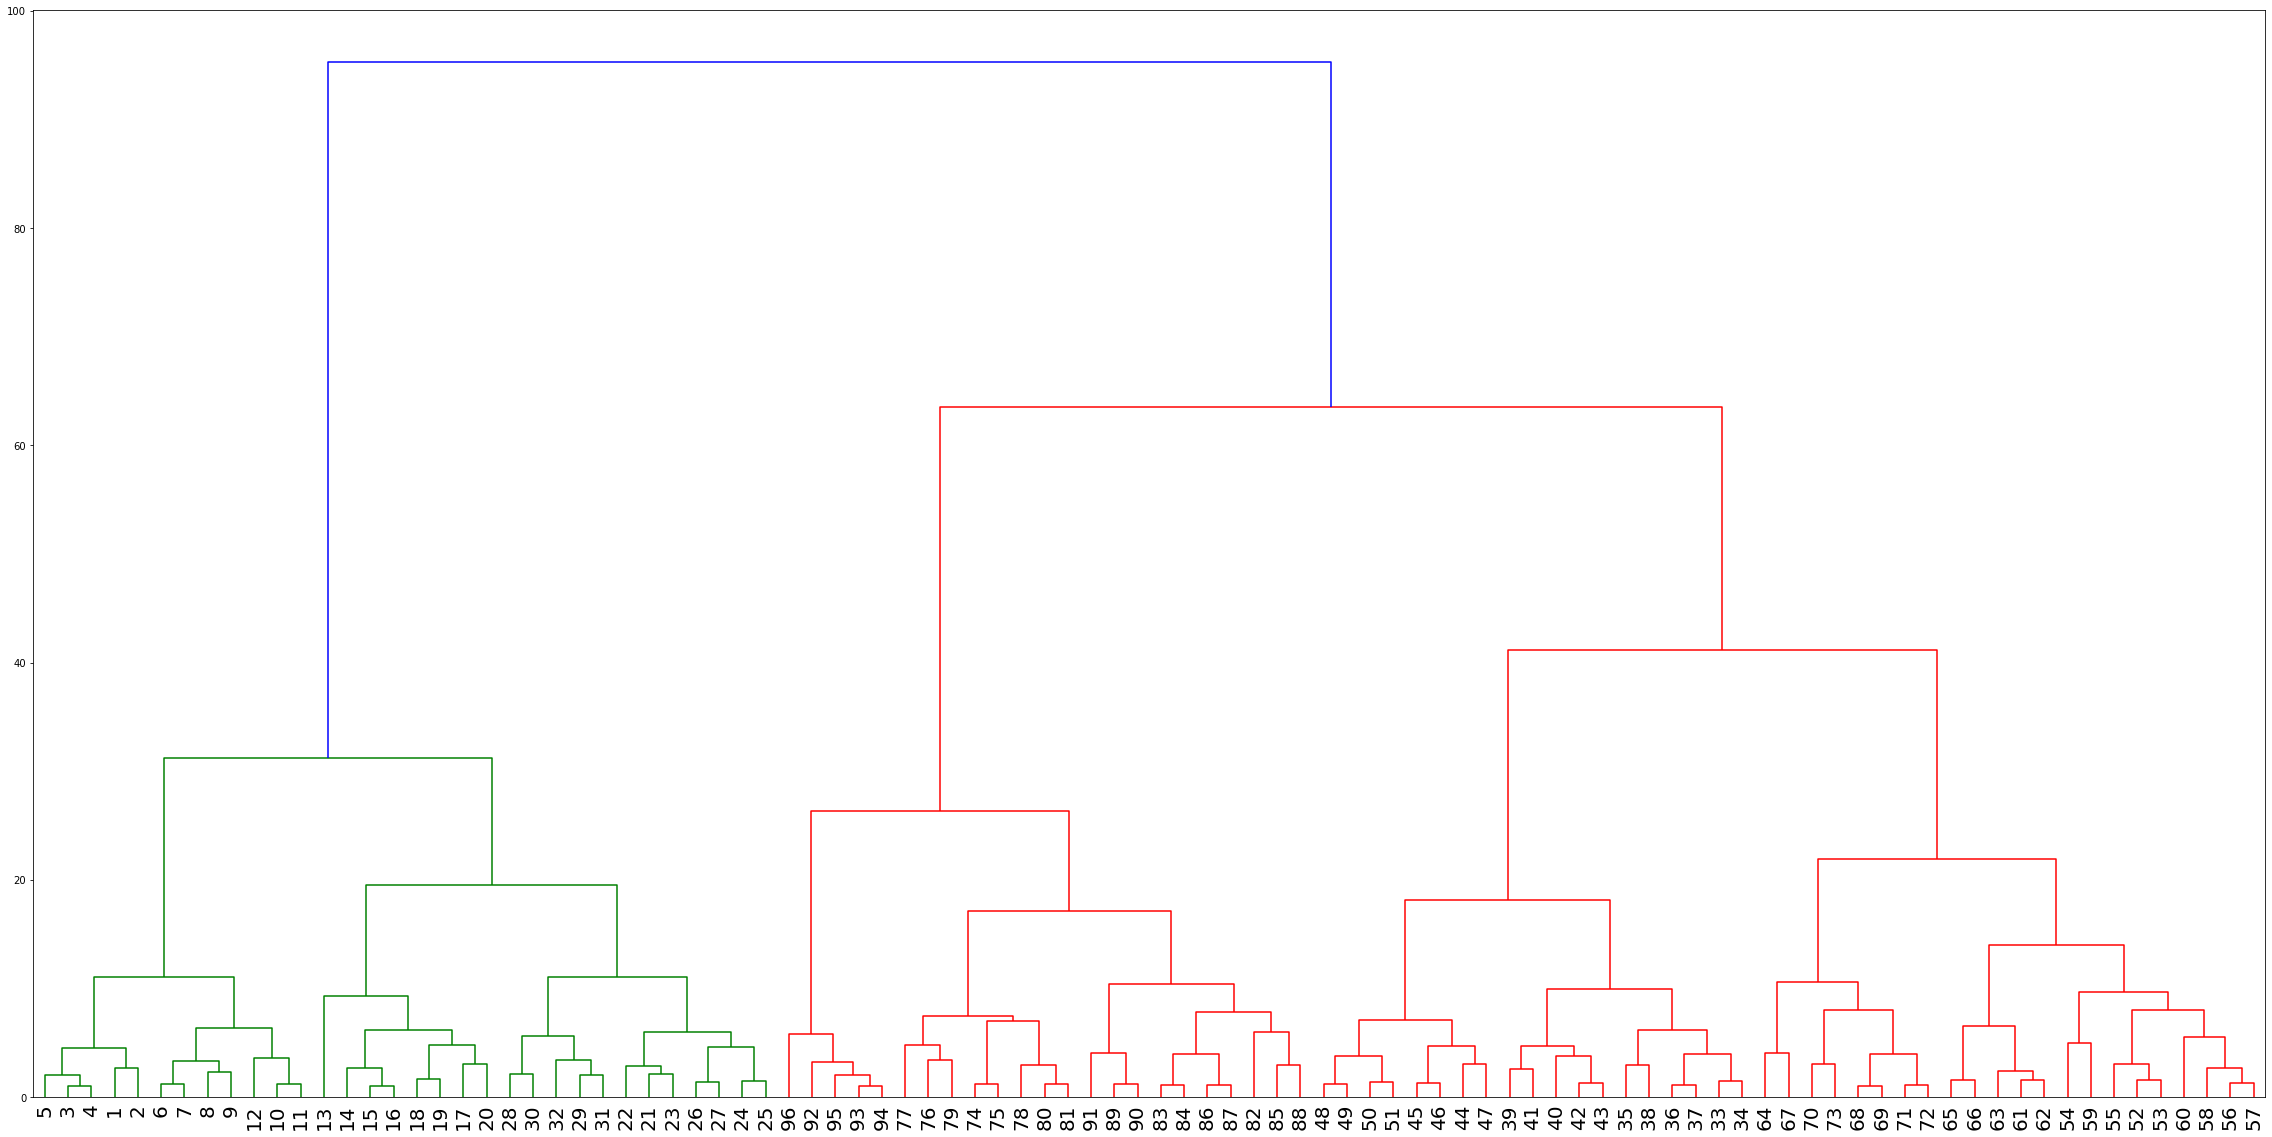

In [10]:
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = label['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=20,  
)
plt.show()

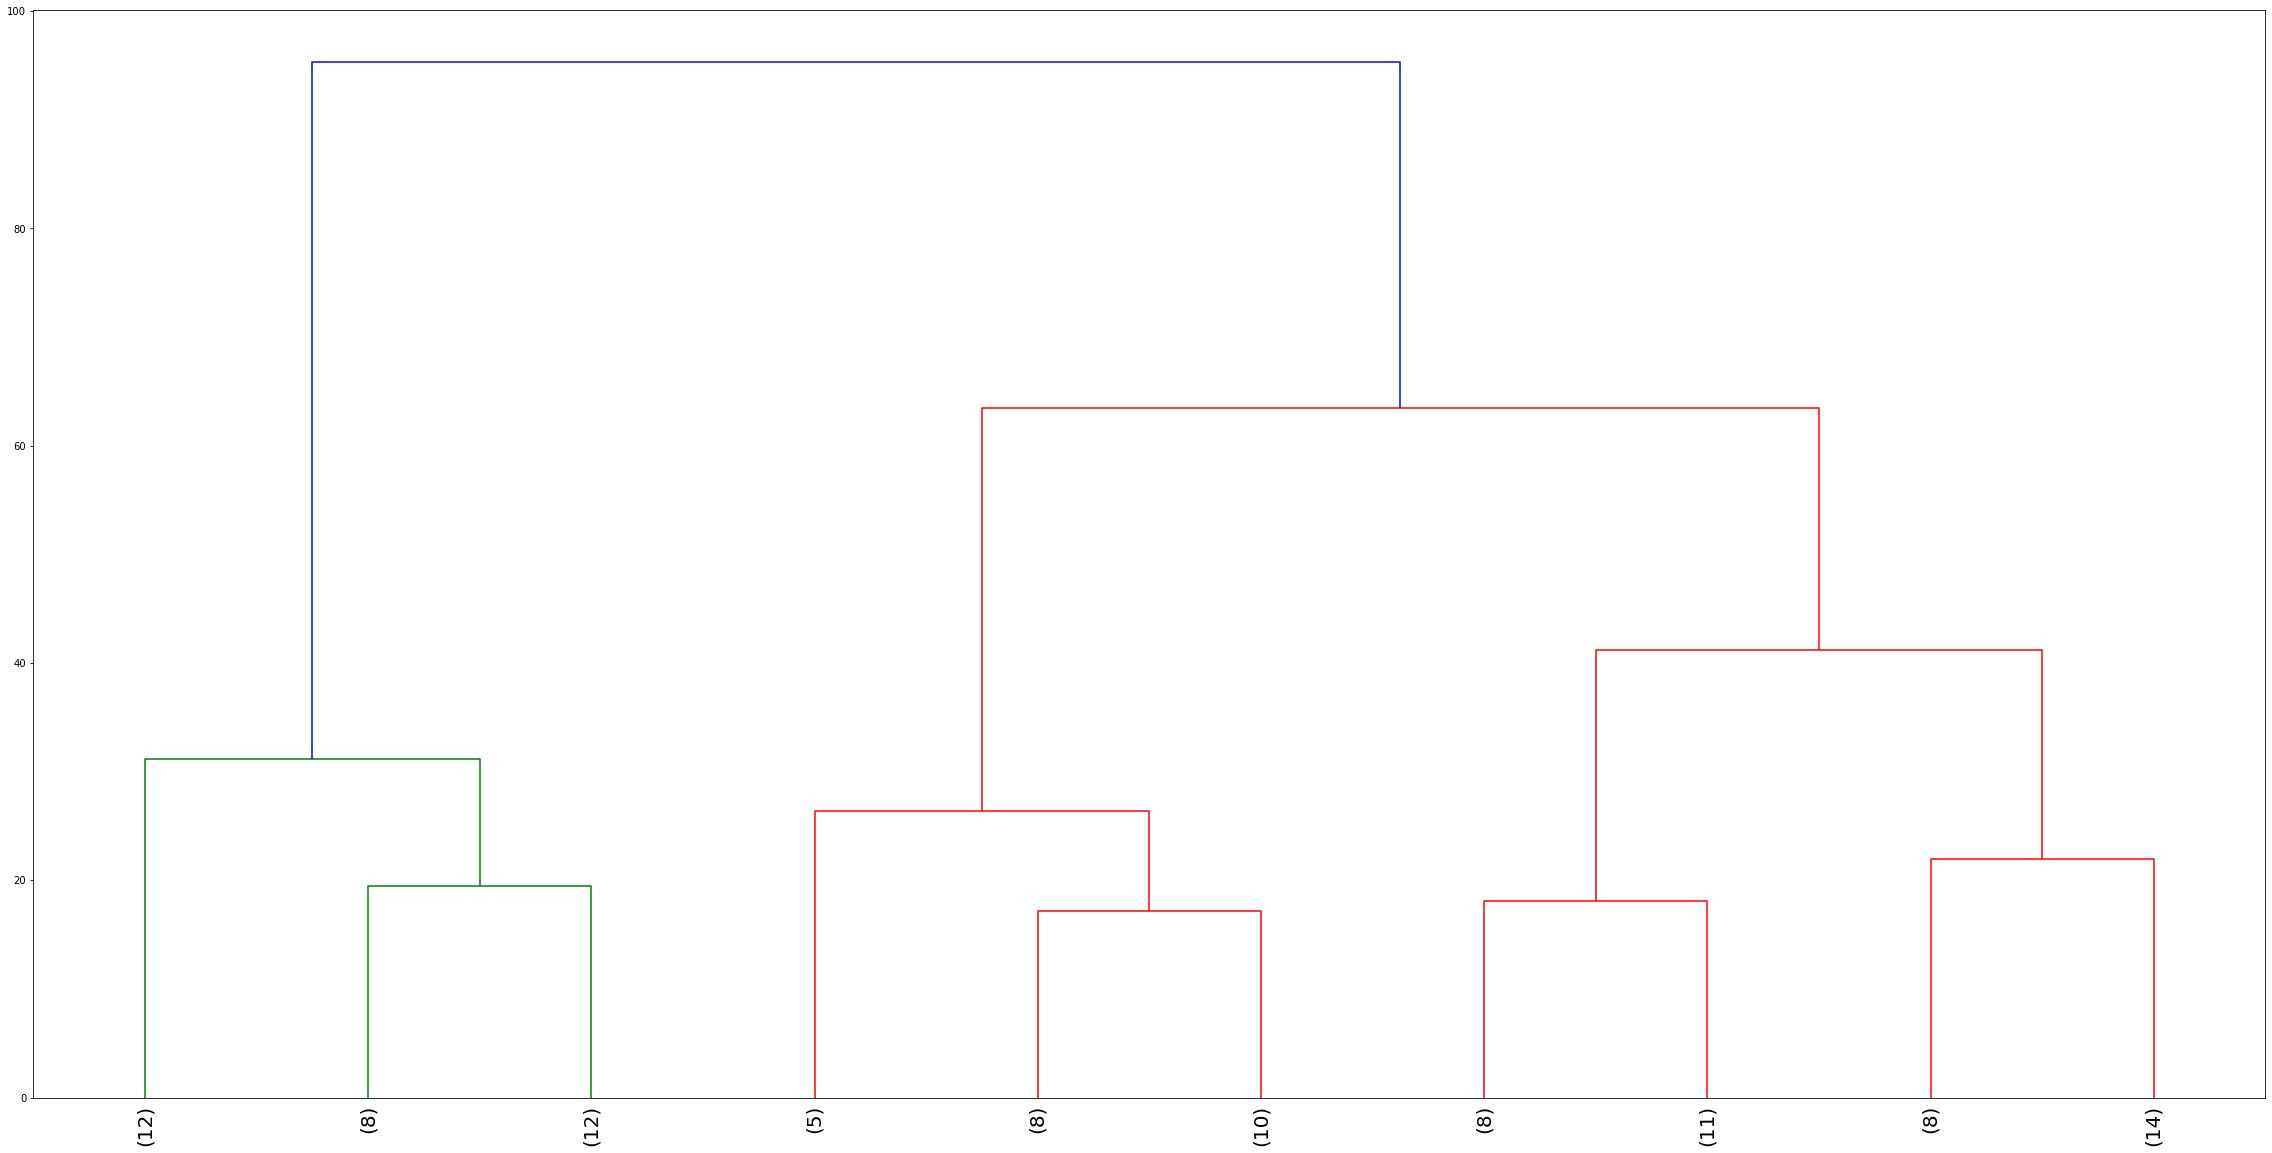

In [11]:
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = label['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=20,  truncate_mode='lastp', p=10
)
plt.show()

In [12]:
cnt_i = 1
cnt = 250 * cnt_i

In [13]:
resist_test = resist.loc[70:90,:cnt]
label_test = label[70:91]
data_test = pd.concat([resist_test, label_test], axis=1)
data_test

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,CellNo
70,0.501,0.496,0.497,0.494,0.496,0.499,0.500,0.502,0.503,0.505,...,0.667,0.667,0.667,0.667,0.667,0.667,0.667,0.667,0.667,71
71,0.480,0.476,0.478,0.477,0.477,0.479,0.481,0.482,0.482,0.481,...,0.651,0.651,0.651,0.651,0.651,0.651,0.651,0.651,0.651,72
72,0.496,0.495,0.497,0.496,0.500,0.499,0.502,0.502,0.502,0.504,...,0.822,0.822,0.822,0.822,0.822,0.822,0.822,0.822,0.822,73
73,0.477,0.486,0.484,0.485,0.486,0.483,0.483,0.483,0.485,0.486,...,0.677,0.677,0.677,0.677,0.677,0.677,0.677,0.677,0.677,74
74,0.488,0.488,0.490,0.488,0.489,0.488,0.491,0.491,0.491,0.493,...,0.698,0.698,0.698,0.698,0.698,0.698,0.698,0.698,0.698,75
75,0.479,0.475,0.475,0.475,0.474,0.473,0.472,0.476,0.476,0.479,...,0.805,0.805,0.805,0.805,0.805,0.805,0.805,0.805,0.805,76
76,0.488,0.468,0.471,0.479,0.484,0.482,0.485,0.485,0.486,0.489,...,0.732,0.732,0.732,0.732,0.732,0.732,0.732,0.732,0.732,77
77,0.477,0.474,0.474,0.474,0.475,0.471,0.471,0.474,0.478,0.479,...,0.686,0.686,0.686,0.686,0.686,0.686,0.686,0.686,0.686,78
78,0.468,0.427,0.435,0.452,0.457,0.471,0.476,0.477,0.476,0.475,...,0.774,0.774,0.774,0.774,0.774,0.774,0.774,0.774,0.774,79
79,0.481,0.477,0.479,0.480,0.477,0.480,0.482,0.483,0.483,0.485,...,0.672,0.672,0.672,0.672,0.672,0.672,0.672,0.672,0.672,80


In [14]:
rank = [[] for i in range(30)]

In [15]:
for i in range(70,91):
    rank[cnt_i-1].append(np.mean(resist.loc[i,:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(70,91,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

1


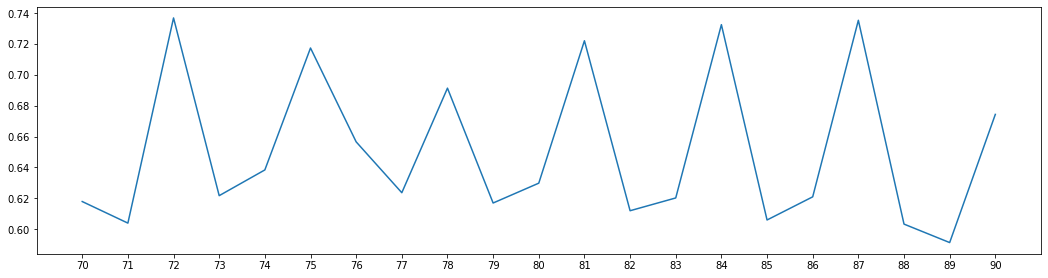

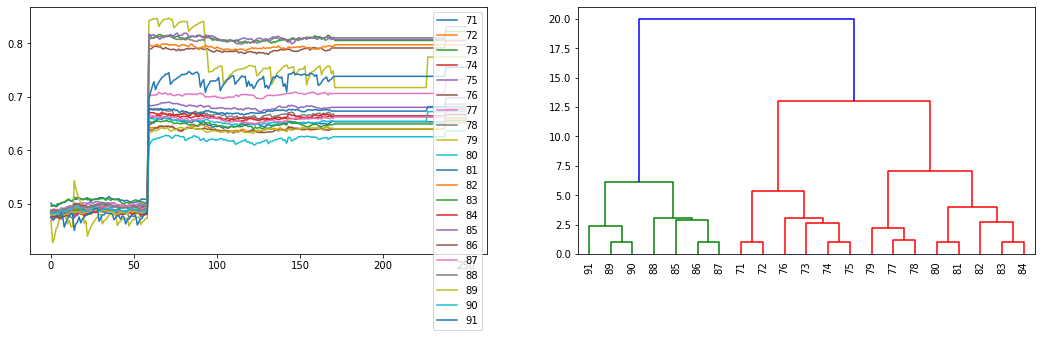

In [16]:
print(cnt_i)



#for i in range(70,91):
#    rank[cnt_i-1].append(np.mean(resist.loc[i,:cnt]))

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(70,91,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(70,91):
    plt.plot(data_test.loc[i,:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10
)
plt.show()
cnt_i += 1

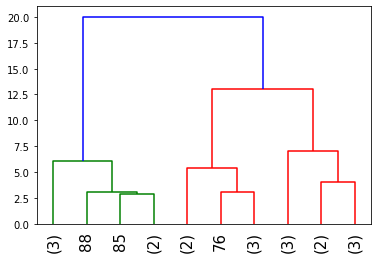

In [17]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

In [18]:
cnt_i

2

2


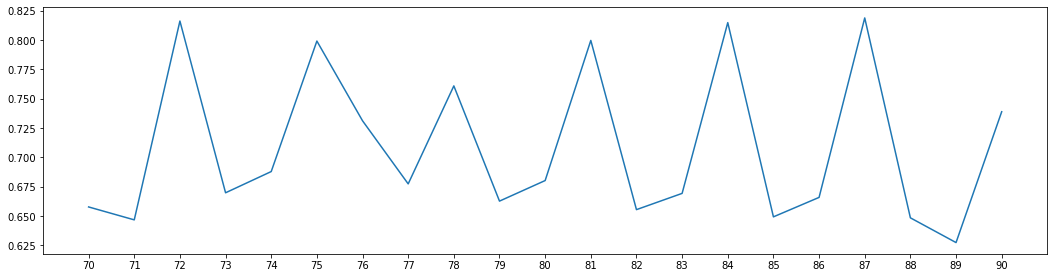

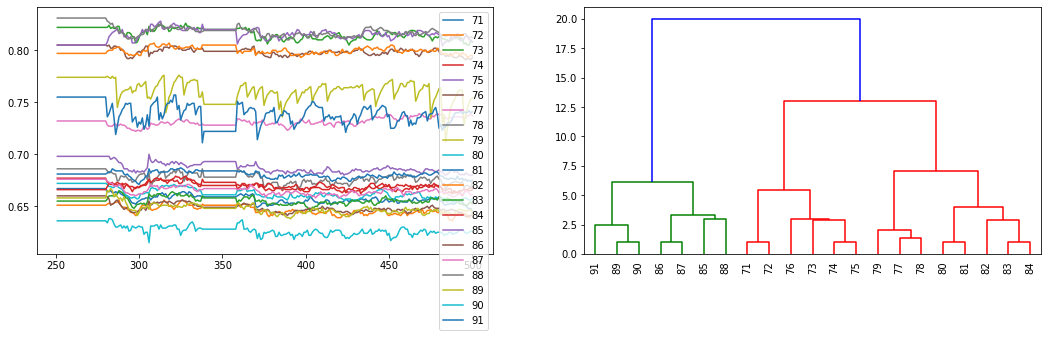

In [19]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[70:90, cnt-249:cnt]
label_test = label[70:91]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(70,91):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(70,91,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(70,91,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(70,91):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

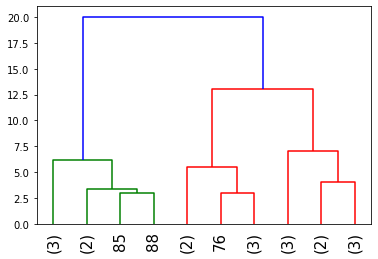

In [20]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

3


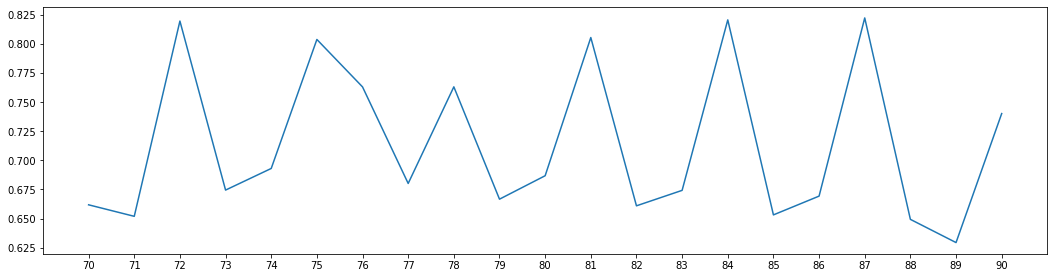

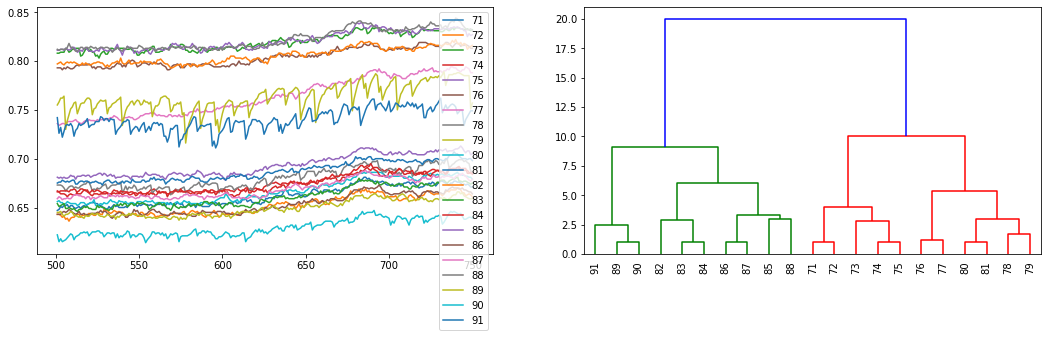

In [21]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[70:90, cnt-249:cnt]
label_test = label[70:91]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(70,91):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(70,91,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(70,91,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(70,91):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

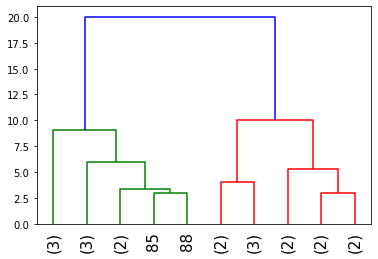

In [22]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

4


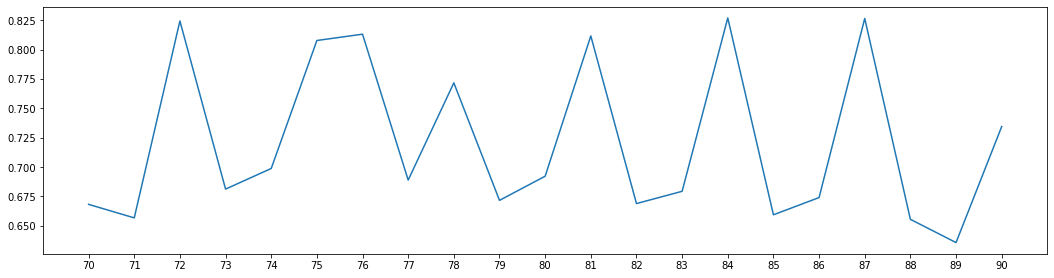

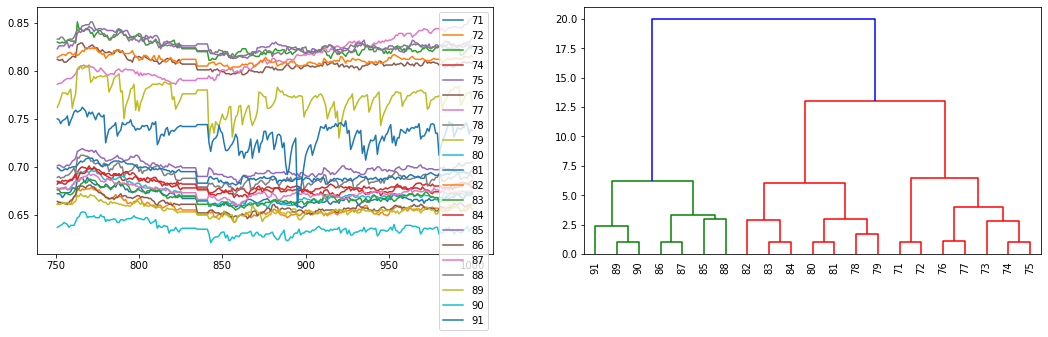

In [23]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[70:90, cnt-249:cnt]
label_test = label[70:91]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(70,91):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(70,91,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(70,91,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(70,91):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

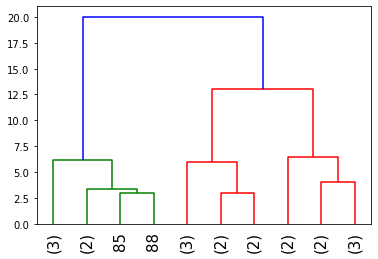

In [24]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

5


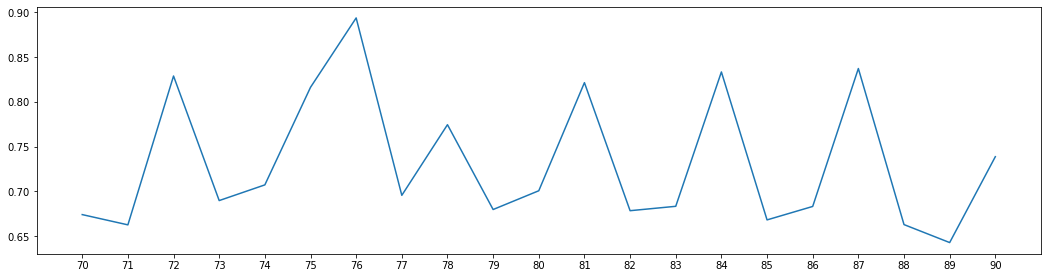

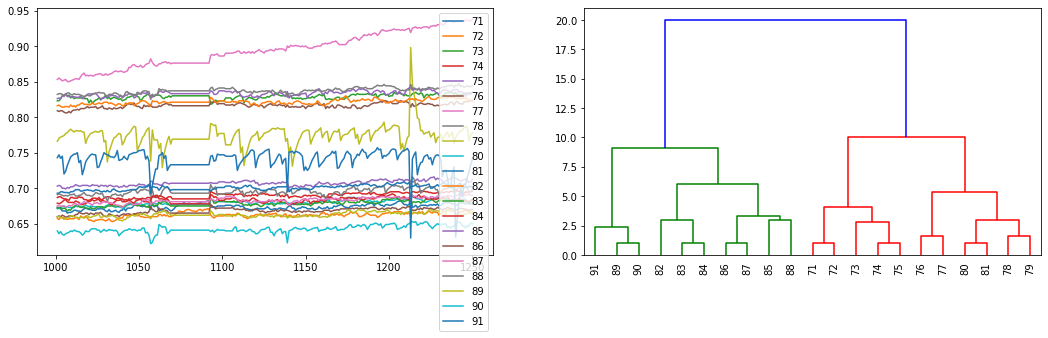

In [25]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[70:90, cnt-249:cnt]
label_test = label[70:91]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(70,91):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(70,91,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(70,91,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(70,91):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

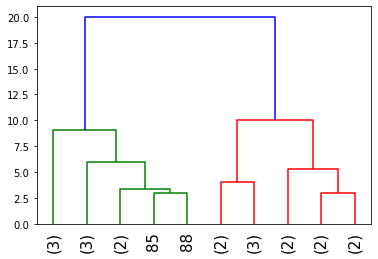

In [26]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

6


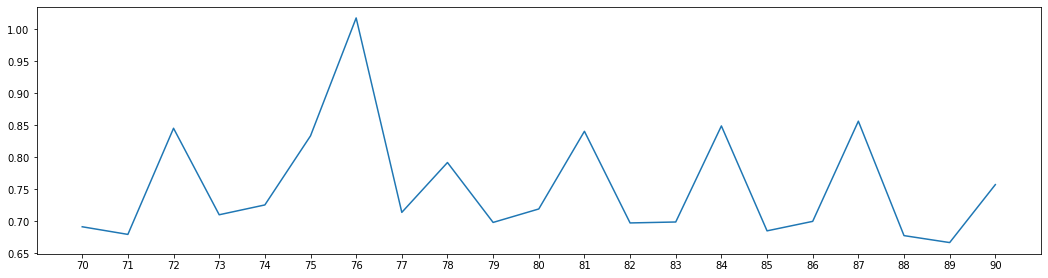

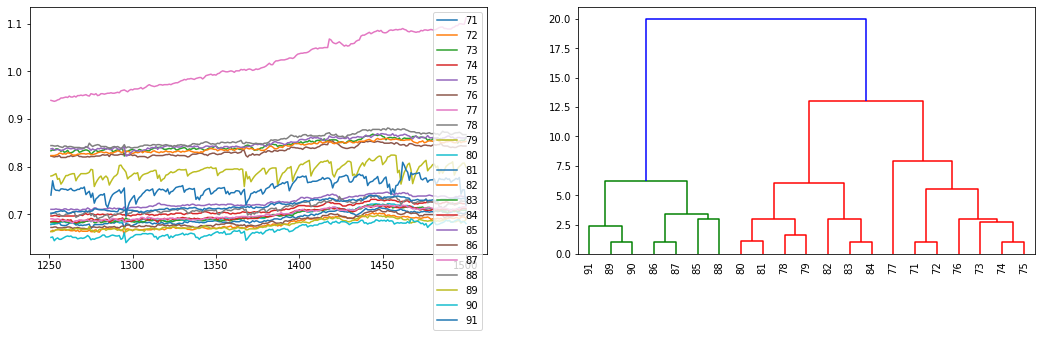

In [27]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[70:90, cnt-249:cnt]
label_test = label[70:91]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(70,91):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(70,91,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(70,91,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(70,91):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

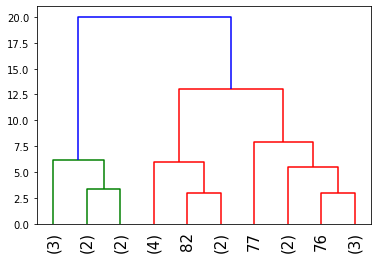

In [28]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

7


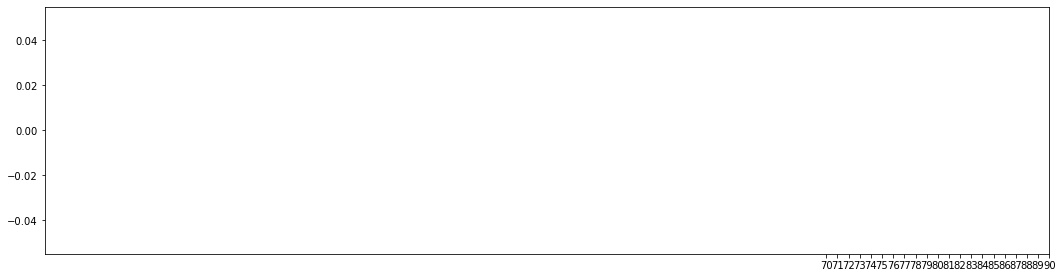

TypeError: cannot do slice indexing on Index with these indexers [1501] of type int

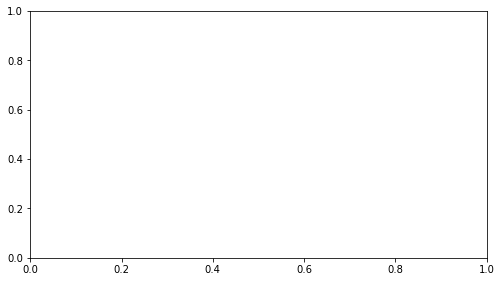

In [29]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[70:90, cnt-249:cnt]
label_test = label[70:91]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(70,91):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(70,91,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(70,91,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(70,91):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

In [ ]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

In [ ]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[70:90, cnt-249:cnt]
label_test = label[70:91]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(70,91):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(70,91,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(70,91,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(70,91):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

In [ ]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

In [ ]:
cnt = 120 * cnt_i
print(cnt_i)


resist_test = resist.loc[70:90, cnt-119:cnt]
label_test = label[70:91]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(70,91):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-119:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(70,91,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(70,91,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(70,91):
    plt.plot(data_test.loc[i,cnt-119:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

In [ ]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

In [ ]:
cnt = 120 * cnt_i
print(cnt_i)


resist_test = resist.loc[70:90, cnt-119:cnt]
label_test = label[70:91]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(70,91):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-119:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(70,91,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(70,91,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(70,91):
    plt.plot(data_test.loc[i,cnt-119:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

In [ ]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

In [ ]:
cnt = 120 * cnt_i
print(cnt_i)


resist_test = resist.loc[70:90, cnt-119:cnt]
label_test = label[70:91]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(70,91):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-119:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(70,91,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(70,91,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(70,91):
    plt.plot(data_test.loc[i,cnt-119:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

In [ ]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

In [ ]:
cnt = 120 * cnt_i
print(cnt_i)


resist_test = resist.loc[70:90, cnt-119:cnt]
label_test = label[70:91]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(70,91):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-119:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(70,91,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(70,91,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(70,91):
    plt.plot(data_test.loc[i,cnt-119:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

In [ ]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

In [ ]:
cnt = 120 * cnt_i
print(cnt_i)


resist_test = resist.loc[70:90, cnt-119:cnt]
label_test = label[70:91]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(70,91):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-119:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(70,91,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(70,91,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(70,91):
    plt.plot(data_test.loc[i,cnt-119:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

In [ ]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

In [ ]:
cnt = 120 * cnt_i
print(cnt_i)


resist_test = resist.loc[70:90, cnt-119:cnt]
label_test = label[70:91]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(70,91):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-119:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(70,91,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(70,91,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(70,91):
    plt.plot(data_test.loc[i,cnt-119:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

In [ ]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

## Kshape 사용

In [ ]:
from kshape.core import kshape, zscore

In [ ]:
resist_test = resist.loc[70:91,700:1400]
label_test = label[70:91]
resist_test_list = (np.array(resist_test)).tolist()

In [ ]:
for i in range(70,91):
    plt.plot(resist_test.loc[i,:], label=i+1)
plt.legend()
plt.show()

In [ ]:
cluster_num = 2
clusters = kshape(zscore(resist_test_list, axis=1), cluster_num)
print(clusters)
cluster_num += 1

In [ ]:
clusters = kshape(zscore(resist_test_list, axis=1), cluster_num)
print(clusters)
cluster_num += 1

In [ ]:
clusters = kshape(zscore(resist_test_list, axis=1), cluster_num)
print(clusters)
cluster_num += 1

In [ ]:
clusters = kshape(zscore(resist_test_list, axis=1), cluster_num)
print(clusters)
cluster_num += 1